ML Assignment 2

Image compression using vector quantization 

Submitted by :- 

Akshat Jain (03)

Arzoo Jangra (06)

In [1]:
## importing required libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

In [2]:
## setting bit values

bit1 = 4
bit2 = 8 
bit3 = 12

In [3]:
## loading the images

image1 = io.imread('/content/Image1.jpeg')
image2 = io.imread('/content/Image2.jpg')

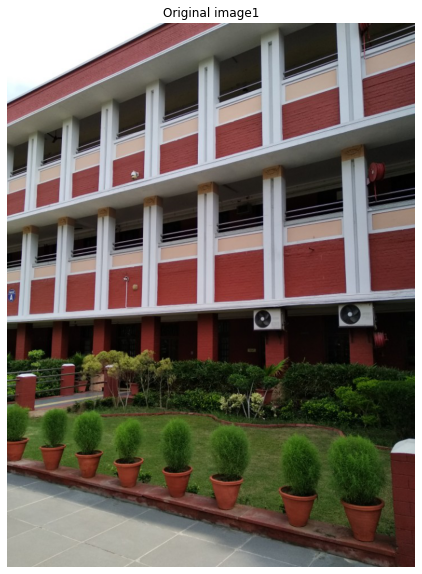

In [4]:
##image1 (outdoor location) 

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.axis("off")
plt.title("Original image1")
plt.imshow(image1)

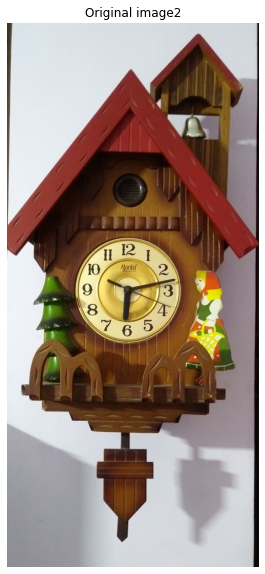

In [5]:
##image2 (clock hanging on the wall) 

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.axis("off")
plt.title("Original image2")
plt.imshow(image2)

In [6]:
##converting the values to the range of (0,1)

image1 = np.array(image1, dtype=np.float64) / 255
image2 = np.array(image2, dtype=np.float64) / 255

In [7]:
##reshaping image1

w1, h1, d1 = original_shape = tuple(image1.shape)
image1_array = np.reshape(image1, (w1 * h1, 3))

In [8]:
##reshaping image2

w2, h2, d2 = original_shape = tuple(image2.shape)
image2_array = np.reshape(image2, (w2* h2, 3))

In [9]:
##compressing the image1

print("Compressing image1 using KNN using 4 bit codebook")
n_colors1 = bit1 * bit1
kmeans1_1 = KMeans(n_clusters = n_colors1, random_state=0).fit(image1_array)
print("Compression complete!!")

print("Compressing image1 using KNN using 8 bit codebook")
n_colors2 = bit2 * bit2
kmeans1_2 = KMeans(n_clusters = n_colors2, random_state=0).fit(image1_array)
print("Compression complete!!")

print("Compressing image1 using KNN using 12 bit codebook")
n_colors3 = bit3 * bit3
kmeans1_3 = KMeans(n_clusters = n_colors3, random_state=0).fit(image1_array)
print("Compression complete!!")

Compressing image1 using KNN using 4 bit codebook
Compression complete!!
Compressing image1 using KNN using 8 bit codebook
Compression complete!!
Compressing image1 using KNN using 12 bit codebook
Compression complete!!


In [10]:
##compressing the image2

print("Compressing image2 using KNN using 4 bit codebook")
kmeans2_1 = KMeans(n_clusters = n_colors1, random_state=0).fit(image1_array)
print("Compression complete!!")

print("Compressing image2 using KNN using 8 bit codebook")
kmeans2_2 = KMeans(n_clusters = n_colors2, random_state=0).fit(image1_array)
print("Compression complete!!")

print("Compressing image2 using KNN using 12 bit codebook")
kmeans2_3 = KMeans(n_clusters = n_colors3, random_state=0).fit(image1_array)
print("Compression complete!!")

Compressing image2 using KNN using 4 bit codebook
Compression complete!!
Compressing image2 using KNN using 8 bit codebook
Compression complete!!
Compressing image2 using KNN using 12 bit codebook
Compression complete!!


In [16]:
##getting labels for all colors

labels1_1 = kmeans1_1.predict(image1_array)  ##labels for image1 for 4bit codebook

labels1_2 = kmeans1_2.predict(image1_array)  ##labels for image1 for 8bit codebook

labels1_3 = kmeans1_3.predict(image1_array)  ##labels for image1 for 12bit codebook

labels2_1 = kmeans2_1.predict(image2_array)  ##labels for image2 for 4bit codebook

labels2_2 = kmeans2_2.predict(image2_array)  ##labels for image2 for 8bit codebook

labels2_3 = kmeans2_3.predict(image2_array)  ##labels for image2 for 12bit codebook

In [12]:
##recreating compressed image from codebook and labels

def image_recreation(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

In [23]:
image1.shape

(960, 720, 3)

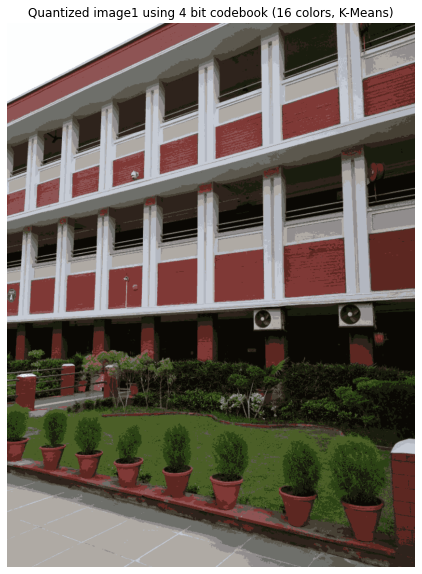

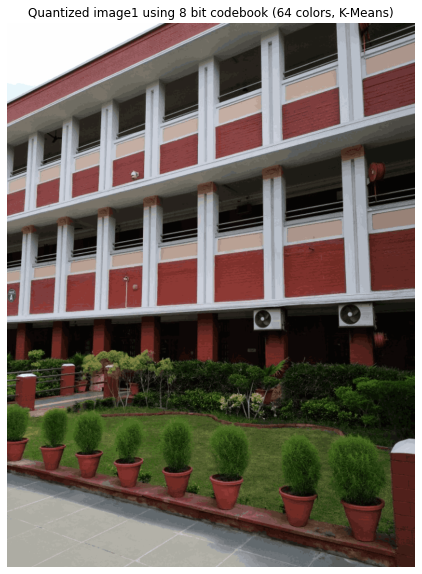

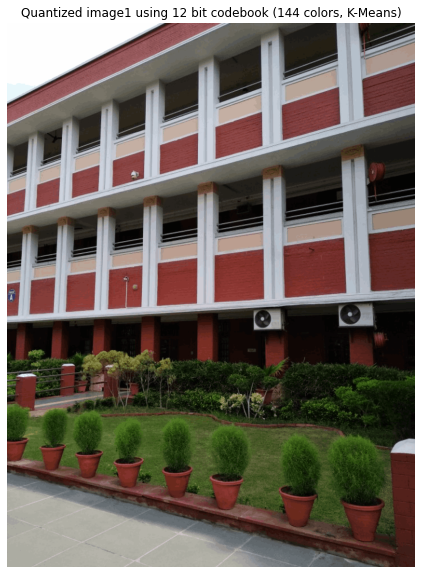

In [24]:
##displaying quantized image1 with respective size of codebooks

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image1 using 4 bit codebook ({n_colors1} colors, K-Means)")
plt.imshow(image_recreation(kmeans1_1.cluster_centers_, labels1_1, w1, h1))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image1 using 8 bit codebook ({n_colors2} colors, K-Means)")
plt.imshow(image_recreation(kmeans1_2.cluster_centers_, labels1_2, w1, h1))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image1 using 12 bit codebook ({n_colors3} colors, K-Means)")
plt.imshow(image_recreation(kmeans1_3.cluster_centers_, labels1_3, w1, h1))

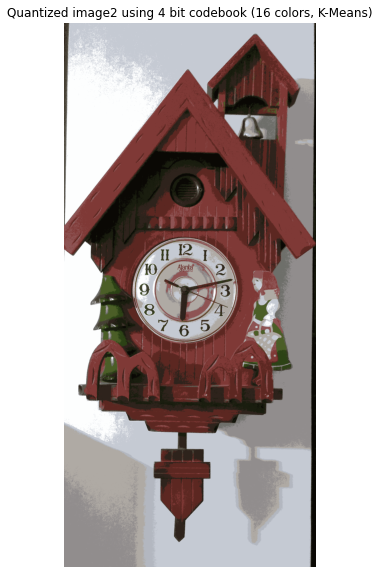

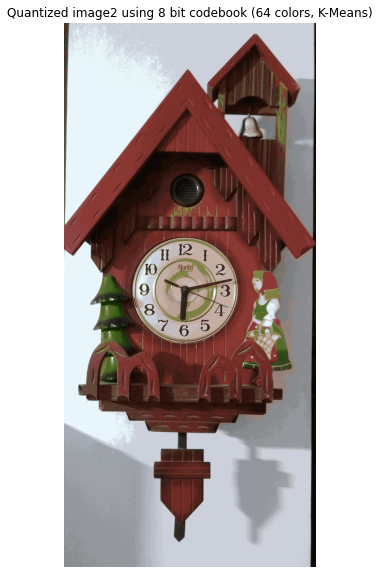

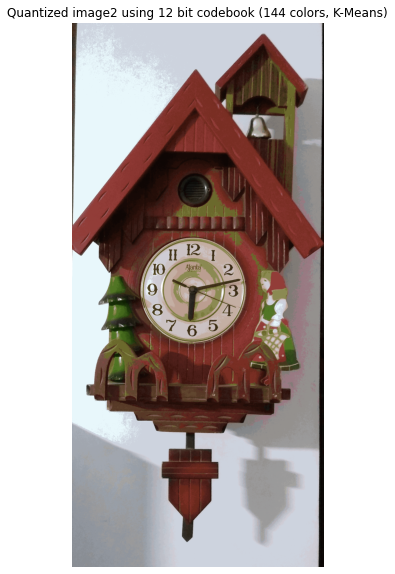

In [25]:
##displaying quantized image2 with respective size of codebooks

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image2 using 4 bit codebook ({n_colors1} colors, K-Means)")
plt.imshow(image_recreation(kmeans2_1.cluster_centers_, labels2_1, w2, h2))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image2 using 8 bit codebook ({n_colors2} colors, K-Means)")
plt.imshow(image_recreation(kmeans2_2.cluster_centers_, labels2_2, w2, h2))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image2 using 12 bit codebook ({n_colors3} colors, K-Means)")
plt.imshow(image_recreation(kmeans2_3.cluster_centers_, labels2_3, w2, h2))